<a href="https://colab.research.google.com/github/DavidAntonio7/Machine_Learning/blob/main/cluster_cartao_credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('CC GENERAL.csv')
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

#aula 2

In [ ]:
df.shape

(8950, 18)

In [ ]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [ ]:
df.drop(columns=['CUST_ID','TENURE'],inplace = True)

In [ ]:
missing = df.isna().sum()
missing

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [ ]:
df.fillna(df.median(),inplace = True)

In [ ]:
missing = df.isna().sum()
missing

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [ ]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(df.values)
values

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5,n_init = 10,max_iter = 300)
y_pred = kmeans.fit_predict(values)

#aula 3, 4 e 5

avaliacao do modelo silhouette

* Mede o quão bem as amostras se encaixam em seus próprios clusters em relação aos outros clusters.
* Varia de -1 a 1, onde valores próximos a 1 indicam boa separação dos clusters.
* É uma métrica amplamente utilizada para avaliar a qualidade da clusterização.

In [ ]:
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values,labels,metric = 'euclidean')
print(silhouette)

0.36443927743081506


avaliacao do modelo davies

* Mede a "similaridade" média entre os clusters.
* Leva em consideração a distância média entre os centroides dos clusters e a dispersão dentro dos clusters.
* Valores menores indicam clusters mais compactos e bem separados

In [ ]:
dbs = metrics.davies_bouldin_score(values,labels)
print(dbs)

1.0758787031571042


Indice de Calinski

* Mede a relação entre a dispersão dentro dos clusters e a dispersão entre os clusters.
* Valores mais altos indicam clusters mais densos e bem separados.
* É uma métrica computacionalmente eficiente e pode ser usada para determinar o número ideal de clusters.

In [ ]:
calinski = metrics.calinski_harabasz_score(values,labels)
calinski

3431.7825481721115

#aula 6

In [ ]:
def clustering_algorit(n_clusters,dataset):
  kmeans = KMeans(n_clusters=n_clusters,n_init=10,max_iter=300)
  labels = kmeans.fit_predict(dataset)
  s = metrics.silhouette_score(dataset,labels,metric='euclidean')
  dbs = metrics.davies_bouldin_score(dataset,labels)
  calinski = metrics.calinski_harabasz_score(dataset,labels)
  return s,dbs,calinski

In [ ]:
s1,dbs1,calinski1 = clustering_algorit(3,values)
print(s1,dbs1,calinski1)

0.3271878995413032 1.3040283022736108 3526.3443019044053


In [ ]:
s2,dbs2,calinski2 = clustering_algorit(5,values)
print(s2,dbs2,calinski2)

0.34861955528487404 1.1527848335300397 3422.8431275922094


In [ ]:
s3,dbs3,calinski3 = clustering_algorit(50,values)
print(s3,dbs3,calinski3)

0.25008027323908183 1.2285756424868872 1615.4918662220737


em caso de metricas parecidas, selecionar o silhouette

In [ ]:
df.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

In [ ]:
import numpy as np

In [ ]:
#comparar com um cluster de dados aleatorios
random_data = np.random.rand(8950,16)
s,dbs,calinski = clustering_algorit(5,random_data)
print(s,dbs,calinski)
print(s2,dbs2,calinski2)

0.039451723190727365 3.513024742142039 302.0363081212833
0.34861955528487404 1.1527848335300397 3422.8431275922094


verificar se o cluster e' estavel -> rodando apenas com uma parte dos dados e os resultado seguem semelhantes

In [ ]:
set1,set1,set1 = np.array_split(values,3)
s1,dbs1,calinski1 = clustering_algorit(5,set1)
s2,dbs2,calinski2 = clustering_algorit(5,set1)
s3,dbs3,calinski3 = clustering_algorit(5,set1)
print(s1,dbs1,calinski1)
print(s2,dbs2,calinski2)
print(s3,dbs3,calinski3)

0.36684613784420705 1.0996881889615515 1167.5304035074312
0.36704188760608253 1.0984932613776763 1167.5309516804
0.36704573758244236 1.0990426578873271 1167.5322875560994


#aula 7

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Valor total gasto')

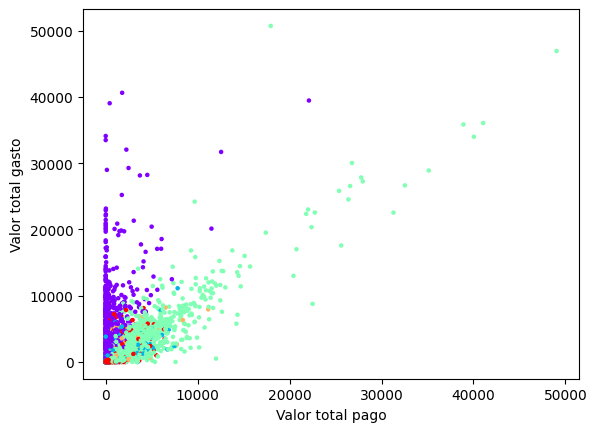

In [ ]:
plt.scatter(df['PURCHASES'],df['PAYMENTS'],c=labels,s=5,cmap='rainbow')
plt.xlabel('Valor total pago')
plt.ylabel('Valor total gasto')

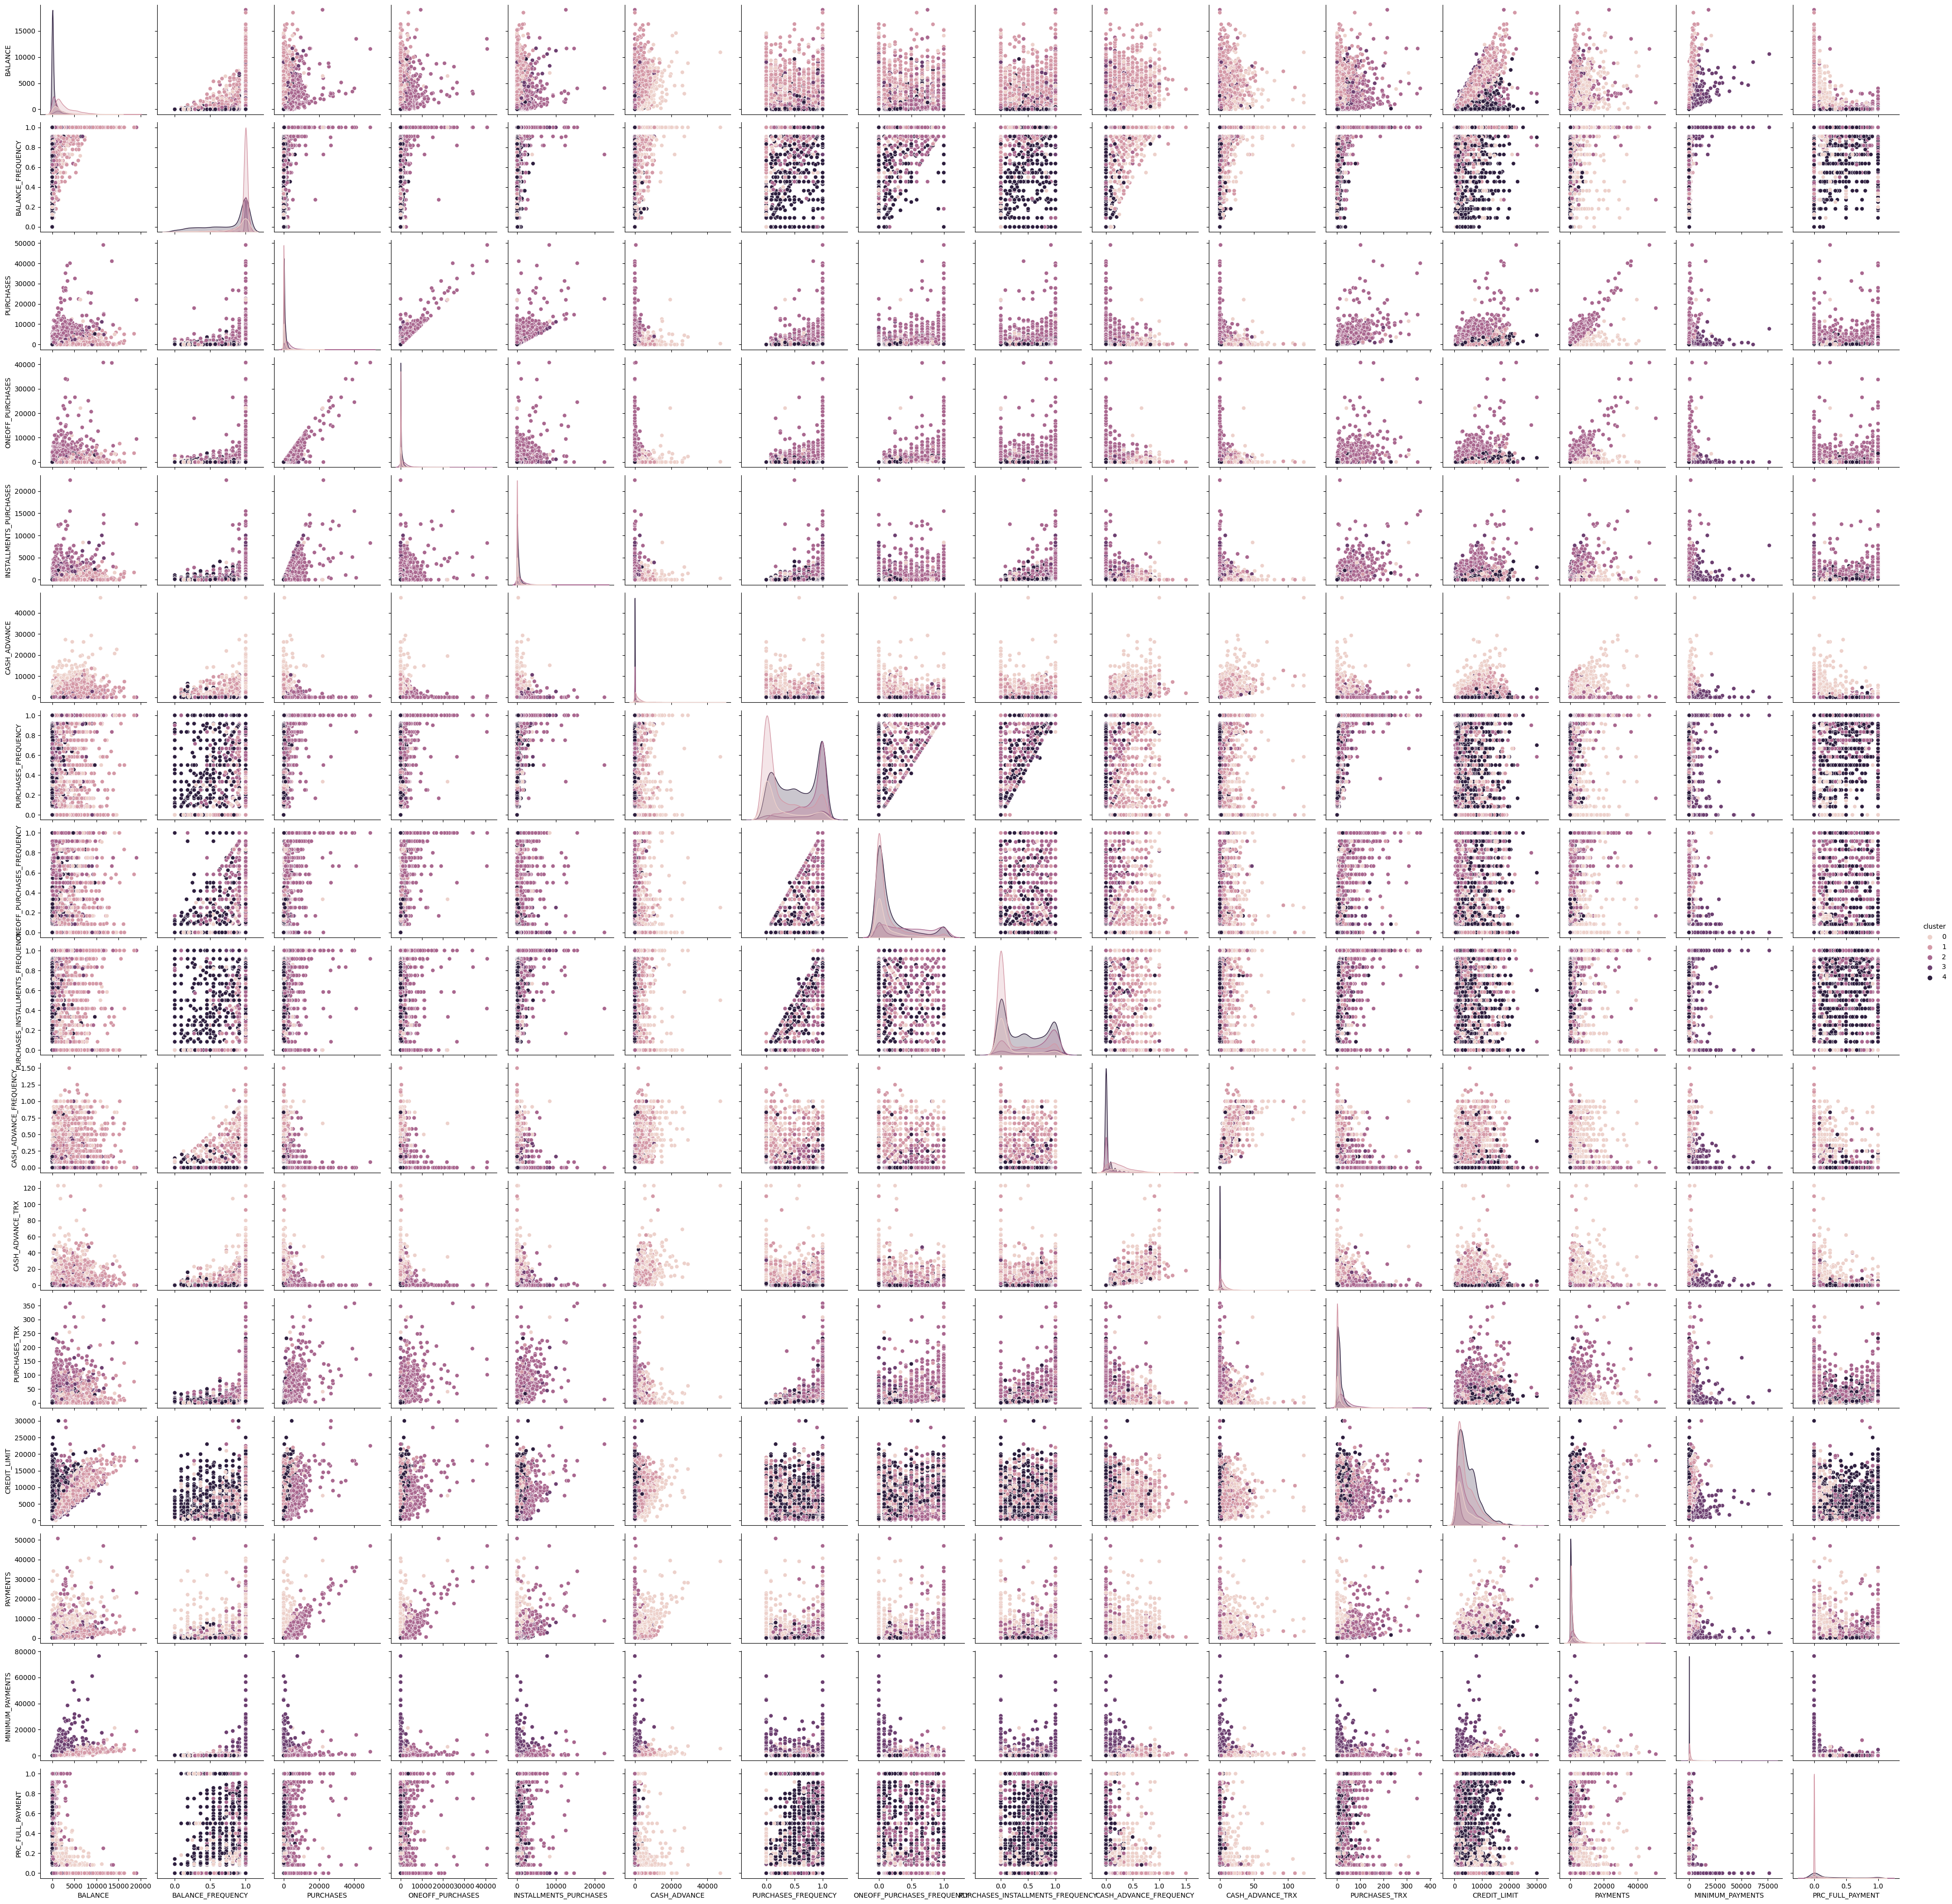

In [ ]:
import seaborn as sns
df['cluster'] = labels
sns.pairplot(df[0:],hue='cluster')

#aula 8 E 9

In [ ]:
df.groupby('cluster').describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        1072.0  1794.024195  1982.950586   0.000000   506.925348   
1        2649.0  3037.962543  2478.838161   6.824905  1256.612223   
2        1541.0  1140.395363  1663.836536   0.000000   209.490297   
3         412.0  1987.146873  1852.215743  70.794108  1020.146724   
4        3276.0   444.212219   846.809334   0.000000    23.287145   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0        1087.920500  2308.762488  14581.459140            1072.0  0.862131   
1        2174.018945  4223.867789  18495.558550            2649.0  0.963740   
2         552.464447  1369.969909  19043.138560            1541.0  0.928099   
3        1338.918346  2133.415063  11670.179850             412.0  0.989512   
4          82.992153   411.833075   9630.367575            3276.0  0.774280   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       884.718306  21235.065300           1072.0  0.117384   
1        ...      1330.593643   8345.641905           2649.0  0.001799   
2        ...       523.422296  18621.013310           1541.0  0.279266   
3        ...      7086.774783  76406.207520            412.0  0.019271   
4        ...       248.900782   4483.503862           3276.0  0.246293   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.186853  0.0  0.0  0.083333  0.142857  1.0  
1        0.023260  0.0  0.0  0.000000  0.000000  0.6  
2        0.367477  0.0  0.0  0.083333  0.545455  1.0  
3        0.090795  0.0  0.0  0.000000  0.000000  1.0  
4        0.346454  0.0  0.0  0.000000  0.444444  1.0  

[5 rows x 128 columns]

In [ ]:
centroides = kmeans.cluster_centers_

In [ ]:
centroides

array([[2.35141479e-01, 2.16555293e-04, 6.03857074e-02, 3.44170171e-02,
        2.59739049e-02, 4.00128071e-01, 5.26401668e-05, 2.04882397e-05,
        3.51921361e-05, 6.54864556e-05, 1.57199032e-03, 1.12217156e-03,
        5.35089146e-01, 5.98040052e-01, 1.04348171e-01, 2.77498236e-05],
       [5.04289599e-01, 2.72275541e-04, 6.17031152e-02, 3.61472866e-02,
        2.55775500e-02, 2.52998524e-01, 6.73317111e-05, 2.56982515e-05,
        4.50750034e-05, 5.74605324e-05, 1.15731022e-03, 1.33218565e-03,
        7.19155598e-01, 1.66164956e-01, 1.79275871e-01, 5.52512128e-07],
       [1.59738813e-01, 2.45539530e-04, 4.37899142e-01, 2.56417561e-01,
        1.81652647e-01, 2.57868915e-02, 2.04724593e-04, 8.88180408e-05,
        1.51100049e-04, 9.36834144e-06, 1.69378578e-04, 6.17391999e-03,
        6.04768068e-01, 4.02440755e-01, 8.52026617e-02, 7.26174325e-05],
       [3.32972556e-01, 2.68240066e-04, 1.58923673e-01, 3.62178588e-02,
        1.23089552e-01, 5.82140753e-02, 1.66817881e-04, 2.642

Selecionar os atributos com os maiores valores de variancia

In [ ]:
max = len(centroides[0])
for i in range(max):
  print(df.columns.values[i], "\n{:.4f}".format(centroides[:,i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0196
ONEOFF_PURCHASES 
0.0076
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0226
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0280
MINIMUM_PAYMENTS 
0.0542
PRC_FULL_PAYMENT 
0.0000


In [ ]:
#melhores variancias
max = len(centroides[0])
for i in range(max):
  if(centroides[:,i].var() >=0.01):
    print(df.columns.values[i], "\n{:.4f}".format(centroides[:,i].var()))

BALANCE 
0.0224
PURCHASES 
0.0196
CASH_ADVANCE 
0.0226
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0280
MINIMUM_PAYMENTS 
0.0542


In [ ]:
description = df.groupby('cluster')['BALANCE','PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS']
n_clientes = description.size()
description = (description.mean())
description['n_clientes']=n_clientes
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0        1794.024195   475.494823   3270.246792   3976.372399  4709.556601   
1        3037.962543   385.248630   1636.917210   4495.771989   968.890376   
2        1140.395363  3266.466710    182.900631   4096.794388  3034.900772   
3        1987.146873   858.326286    420.107194   2226.699029  1338.974045   
4         444.212219   629.173858    141.655729   5134.705973   814.396458   

         n_clientes  
cluster              
0              1072  
1              2649  
2              1541  
3               412  
4              3276  


<ipython-input-53-891faf0207a1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = df.groupby('cluster')['BALANCE','PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS']


In [ ]:
df.groupby('cluster')['PRC_FULL_PAYMENT'].describe()

count      mean       std  min  25%       50%       75%  max
cluster                                                               
0        1072.0  0.117384  0.186853  0.0  0.0  0.083333  0.142857  1.0
1        2649.0  0.001799  0.023260  0.0  0.0  0.000000  0.000000  0.6
2        1541.0  0.279266  0.367477  0.0  0.0  0.083333  0.545455  1.0
3         412.0  0.019271  0.090795  0.0  0.0  0.000000  0.000000  1.0
4        3276.0  0.246293  0.346454  0.0  0.0  0.000000  0.444444  1.0

Cluster 0: Clientes com menores valores gastos. Menor valor em saques. -> CLIENTES QUE GASTAM POUCO. CLIENTES COM O MAIOR LIMITE. BONS PAGADORES. MAIOR NUMERO DE CLIENTES<br>
cluster 1: Clientes com maiores valores gastos. Menor valor em compras. Valor consideravel em saques -> CLIENTES QUE MAIS GASTAM. O FOCO E' EM SAQUE. PIORES PAGADORES<br>
Cluster 2: Maior valor em compras com grande diferenca. -> CLIENTES QUE GASTAM MUITO COM COMPRAS. MELHORES PAGADORES<br>
Cluster 3: Maior valor em Saques -> CLIENTES QUE GASTAM MUITO COM SAQUES. PAGAM AS VEZES<br>
Cluster 4: CLIENTES COM O MENOR LIMITE. NAO SAO BONS PAGADORES. MENOR QUANTIDADE DE CLIENTES<br>

In [ ]:
df.groupby('cluster')['PRC_FULL_PAYMENT'].describe()

count      mean       std  min  25%       50%       75%  max
cluster                                                               
0        1072.0  0.117384  0.186853  0.0  0.0  0.083333  0.142857  1.0
1        2649.0  0.001799  0.023260  0.0  0.0  0.000000  0.000000  0.6
2        1541.0  0.279266  0.367477  0.0  0.0  0.083333  0.545455  1.0
3         412.0  0.019271  0.090795  0.0  0.0  0.000000  0.000000  1.0
4        3276.0  0.246293  0.346454  0.0  0.0  0.000000  0.444444  1.0